In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

# Load the data :

In [4]:
dataset_path=Path('C:/Users/Thibaut/Desktop/archive/kaggle_bee_vs_wasp') ##TO CHANGE WHEN IN FINAL FILE
data = pd.read_csv(dataset_path/'labels.csv')

In [5]:
data.head(3)

,id,path,is_bee,is_wasp,is_otherinsect,is_other,photo_quality,is_validation,is_final_validation,label
0,1,bee1\10007154554_026417cfd0_n.jpg,1,0,0,0,1,0,0,bee
1,2,bee1\10024864894_6dc54d4b34_n.jpg,1,0,0,0,1,0,1,bee
2,3,bee1\10092043833_7306dfd1f0_n.jpg,1,0,0,0,1,1,0,bee


We drop the id columns because it's useless :

In [6]:
data = data.drop(columns = 'id')

In [7]:
data.head(3)

,path,is_bee,is_wasp,is_otherinsect,is_other,photo_quality,is_validation,is_final_validation,label
0,bee1\10007154554_026417cfd0_n.jpg,1,0,0,0,1,0,0,bee
1,bee1\10024864894_6dc54d4b34_n.jpg,1,0,0,0,1,0,1,bee
2,bee1\10092043833_7306dfd1f0_n.jpg,1,0,0,0,1,1,0,bee


-------------------------

# Remove bad images

Our goal here is to save the index of all the bad images to remove them later.

In [8]:
bad_images = []

When we have looked to our dataset, we found out that one was a picture of a logo and it's easier for us to remove it now. <br>
Its name was "image" so we are looking for this name.

In [9]:
bad_images.append(data[data['path'].str.contains("image")].index[0])

Now we load all images to have an access of their shapes :

In [15]:
img = []
for i in range(0,data.shape[0]):
    img.append(mpimg.imread('C:/Users/Thibaut/Desktop/archive/kaggle_bee_vs_wasp/'+data.iloc[i][0]))

We are now looking for pictures which are not in the RGB format (such as black & white or RGBAlpha).

In [16]:
for i in range(0,len(img)):
    shape = np.shape(img[i])
    if(len(shape)==2 or shape[2] != 3):
        bad_images.append(i)

In [17]:
len(f'We have {bad_images} bad images')

64

Finally we drop all those images from our dataframe :

In [19]:
data = data.drop(index = bad_images)

Now we will save all index of bad images (black and white images, images with transparancy etc) and delete them because they are few.

We save it in a new CSV file :<br>
If you want to re-save the cleaned data set you can but it's long (so we comment it to avoid any accidents). 

In [ ]:
#data.to_csv(r'd:/Various/kaggle_bee_vs_wasp/data_cleaned.csv',index=False) 

-----------------------------------

# Converting into a RGB dataframe

We load the data :

In [6]:
#data = pd.read_csv('d:/Various/kaggle_bee_vs_wasp/data_cleaned.csv')

In [20]:
data.head(3)

,path,is_bee,is_wasp,is_otherinsect,is_other,photo_quality,is_validation,is_final_validation,label
0,bee1\10007154554_026417cfd0_n.jpg,1,0,0,0,1,0,0,bee
1,bee1\10024864894_6dc54d4b34_n.jpg,1,0,0,0,1,0,1,bee
2,bee1\10092043833_7306dfd1f0_n.jpg,1,0,0,0,1,1,0,bee


In [22]:
img = []
for i in range(0,data.shape[0]):
    img.append(mpimg.imread('C:/Users/Thibaut/Desktop/archive/kaggle_bee_vs_wasp/'+data.iloc[i][0]))

In [23]:
for i in range(0,3):
    print('The image',i,'has this shape',np.shape(img[i]))

The image 0 has this shape (213, 320, 3)
The image 1 has this shape (213, 319, 3)
The image 2 has this shape (266, 320, 3)


As we can see we don't have the same resolution for all images. We will crop those images to have scared images with the following method :

In [24]:
def perfect_resize(img):
    x = np.shape(img)
    
    diff = np.abs(x[0] - x[1])
    a = int(diff/2)
    
    if(len(x) == 3):
        if (x[0] < x[1]):
            b = int(x[1]-(diff/2))
            res = img[:,a:b,:]
        else:
            b = int(x[0]-(diff/2))
            res = img[a:b,:,:]
    else:
        if (x[0] < x[1]):
            b = int(x[1]-(diff/2))
            res = img[:,a:b]
        else:
            b = int(x[0]-(diff/2))
            res = img[a:b,:]
        
    return res

In [25]:
for i in range(0,np.shape(img)[0]):
    img[i] = perfect_resize(img[i])

Now we check if all images are squared images :

In [26]:
for i in range(0,len(img)):
    if(np.shape(img[i])[0] != np.shape(img[i])[1]):
        print(np.shape(img[0])[0],np.shape(img)[1])
        print("Erreur, des images ont mal été modifiés :" , i)

Now we check what is the smallest size of all images :

In [27]:
mini = 1564
for i in range(0,len(img)):
    if np.shape(img[i])[0] < mini :
        mini = np.shape(img[i])[0]
        j = i
print(mini)

124


So we reduced all images with this size :

In [28]:
for i in range(0,len(img)):
    temp = Image.fromarray(img[i])
    img[i] = np.array(temp.resize(size=(mini, mini)))

In [29]:
for i in range(0,len(img)):
    if (np.shape(img[i])[0] != mini) or (np.shape(img[i])[1] != mini) or (np.shape(img[i])[2] != 3):
        print('Error')

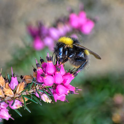

In [30]:
Image.fromarray(img[78])

Now we will flatten the array to insert it into the dataframe :

In [31]:
for i in range(0,len(img)):
    img[i] = img[i].ravel()

In [32]:
for i in range(0,len(img)):
    if (np.shape(img[i])[0] != mini*mini*3):
        print('Error',i)

Now we will convert the array img into a dataframe :

In [33]:
column = []
for i in range(0,mini*mini):
    name = 'pixel_'+str(1+int(i/mini))+'_'+str(1+(i%mini))
    column.append(name+'_R')
    column.append(name+'_G')
    column.append(name+'_B')

In [34]:
np.shape(img)

(11415, 46128)

In [35]:
images = pd.DataFrame(columns = column, data=img)

In [21]:
#images = pd.DataFrame(columns = column)

In [24]:
# for i in range(0,len(img)):
#     images.loc[i] = img[i]
#     if i%100 == 0:
#         print(i)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400


In [3]:
data

,pixel_1_1_R,pixel_1_1_G,pixel_1_1_B,pixel_1_2_R,pixel_1_2_G,pixel_1_2_B,pixel_1_3_R,pixel_1_3_G,pixel_1_3_B,pixel_1_4_R,...,pixel_124_121_B,pixel_124_122_R,pixel_124_122_G,pixel_124_122_B,pixel_124_123_R,pixel_124_123_G,pixel_124_123_B,pixel_124_124_R,pixel_124_124_G,pixel_124_124_B
0,87,10,37,105,29,54,111,37,58,116,...,68,111,41,60,99,28,53,86,18,46
1,65,68,39,66,70,40,68,73,43,71,...,0,251,156,0,254,171,2,255,183,1
2,123,126,79,123,126,79,124,126,79,121,...,31,108,128,14,104,125,10,103,126,22
3,165,116,199,195,153,222,216,177,237,216,...,10,19,20,14,17,17,11,19,16,7
4,232,195,117,229,191,117,222,175,110,216,...,88,190,88,91,187,88,90,186,89,89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11410,120,95,85,120,99,86,120,100,91,124,...,192,205,194,192,204,194,190,203,195,190
11411,41,43,65,74,79,86,155,157,160,219,...,73,40,58,77,47,58,74,48,58,66
11412,63,68,78,63,67,78,63,67,76,64,...,32,41,32,27,39,29,25,35,29,34
11413,24,28,37,23,32,22,26,36,39,22,...,176,166,162,163,177,171,171,178,171,170


In [28]:
images.to_csv(r'd:/Various/kaggle_bee_vs_wasp/final.csv',index=False)

In [2]:
data = pd.read_csv('d:/Various/kaggle_bee_vs_wasp/final.csv')